###
## How to Choose the Best Value of K?
######

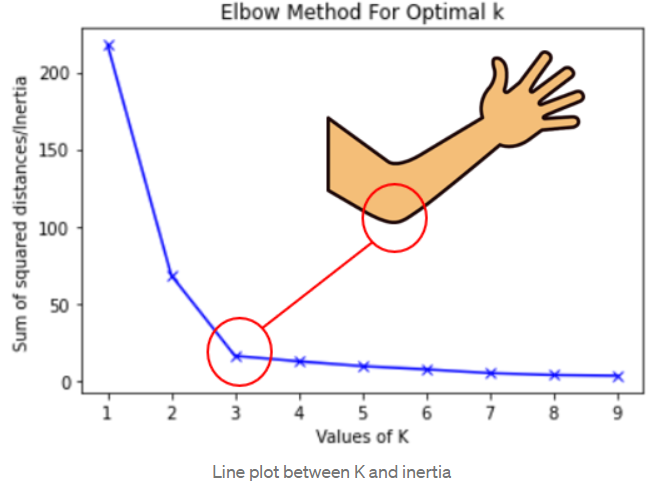

###


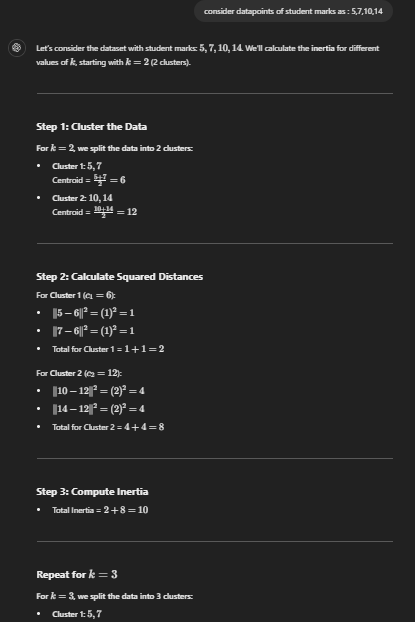

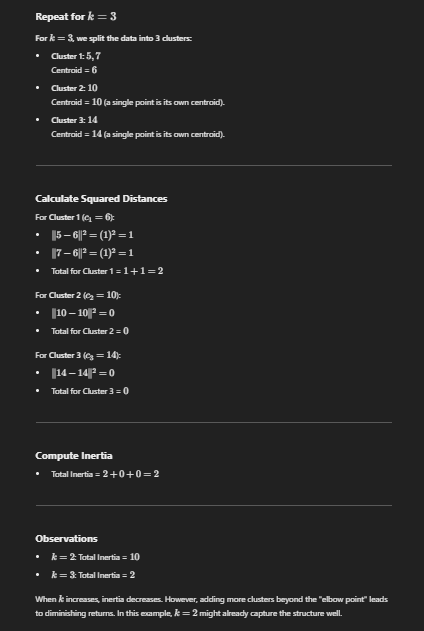

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

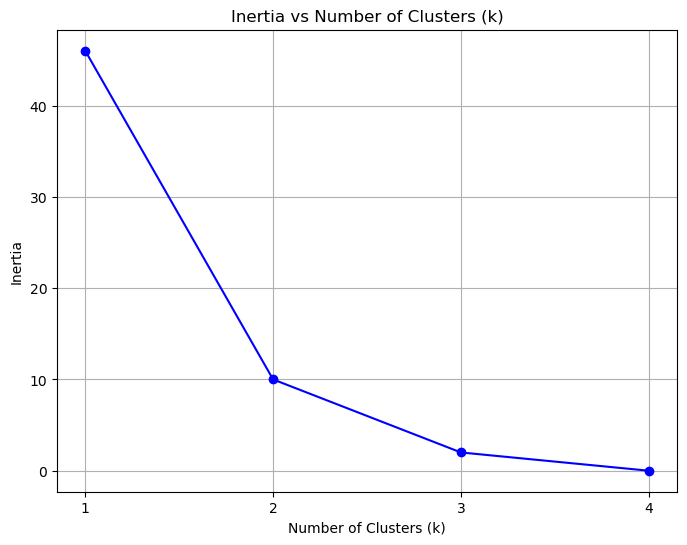

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset: Student marks
data = np.array([5, 7, 10, 14]).reshape(-1, 1)

# List to store the inertia for each k
inertia_values = []

# Run KMeans for k = 1 to k = 4
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia vs k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Inertia vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()


### Forget the code, just keep remember we will gather all centroids for clusters as mentioned in chatgpt pic, and through code we will plot the plot, and where the elbow is showing i.e: at 2 in above plot so it will be the best cluster value (k value)

###
## Method 2) Silhouette Score:
###
#### Why the Silhouette Method Is Better Than the Elbow Method?
#### The Silhouette score is a very useful method to find the number of K when the elbow method doesn't show the elbow point. The value of the Silhouette score ranges from -1 to 1. 
#### The cluster on which the silhouette score is the maximum is the best cluster value (k value).
####

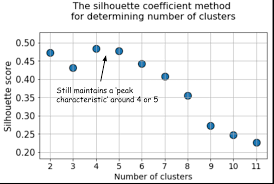

In [1]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Dataset
data = np.array([[1], [2], [5], [10]])

# Function to calculate silhouette score for a given k
def calculate_silhouette(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    return score

# Compute silhouette scores for k = 2 and k = 3
silhouette_k2 = calculate_silhouette(data, k=2)
silhouette_k3 = calculate_silhouette(data, k=3)

print(f"Silhouette Score for k=2: {silhouette_k2:.3f}")
print(f"Silhouette Score for k=3: {silhouette_k3:.3f}")

# Compare the results
optimal_k = 3 if silhouette_k3 > silhouette_k2 else 2
print(f"The optimal number of clusters (k) is: {optimal_k}")


Silhouette Score for k=2: 0.443
Silhouette Score for k=3: 0.354
The optimal number of clusters (k) is: 2


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


###
## Silhouette Plot:
###

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Skipping k=4 due to error: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)


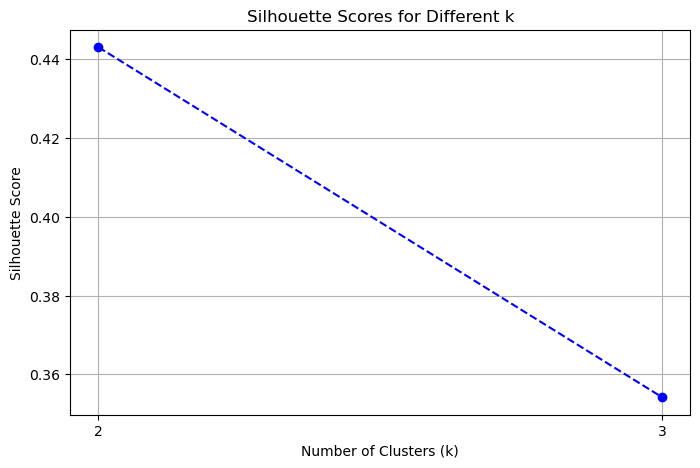

Silhouette Score for k=2: 0.443
Silhouette Score for k=3: 0.354


In [3]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset
data = np.array([[1], [2], [5], [10]])

# Function to calculate silhouette scores for a range of k values
def silhouette_scores(data, k_range):
    scores = []
    for k in k_range:
        try:
            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(data)
            score = silhouette_score(data, labels)
            scores.append(score)
        except ValueError as e:
            print(f"Skipping k={k} due to error: {e}")
            scores.append(None)  # Placeholder for invalid scores
    return scores

# Define the range of k values
k_values = range(2, 5)  # Testing for k=2, k=3, and k=4
silhouette_scores_list = silhouette_scores(data, k_values)

# Filter out None values for plotting
valid_k_values = [k for k, score in zip(k_values, silhouette_scores_list) if score is not None]
valid_scores = [score for score in silhouette_scores_list if score is not None]

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(valid_k_values, valid_scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(valid_k_values)
plt.grid()
plt.show()

# Print results
for k, score in zip(valid_k_values, valid_scores):
    print(f"Silhouette Score for k={k}: {score:.3f}")
